In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/all_t20_world_cup_matches_results.csv')

#EDA

In [ ]:
df.head()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match
0,India,Pakistan,India,5 runs,Johannesburg,2007/09/24,T20I # 46
1,Australia,India,India,15 runs,Durban,2007/09/22,T20I # 45
2,New Zealand,Pakistan,Pakistan,6 wickets,Cape Town,2007/09/22,T20I # 44
3,South Africa,India,India,37 runs,Durban,2007/09/20,T20I # 43
4,Bangladesh,Pakistan,Pakistan,4 wickets,Cape Town,2007/09/20,T20I # 42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team1           317 non-null    object
 1   Team2           317 non-null    object
 2   Winner          317 non-null    object
 3   Margin          317 non-null    object
 4   Ground          317 non-null    object
 5   Match Date      317 non-null    object
 6   T-20 Int Match  317 non-null    object
dtypes: object(7)
memory usage: 17.5+ KB


In [ ]:
df.isnull().sum()#no null

,0
Team1,0
Team2,0
Winner,0
Margin,0
Ground,0
Match Date,0
T-20 Int Match,0


In [ ]:
df.describe()

,Team1,Team2,Winner,Margin,Ground,Match Date,T-20 Int Match
count,317,317,317,317,317,317,317
unique,22,23,24,85,39,176,317
top,Australia,Pakistan,India,6 wickets,Bridgetown,2007/09/20,T20I # 2632
freq,43,40,35,30,20,3,1


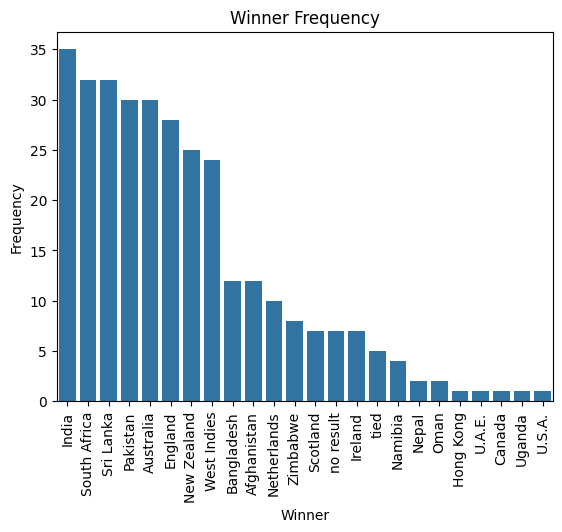

In [ ]:
winner_counts=df['Winner'].value_counts()
sns.barplot(x=winner_counts.index,y=winner_counts.values)
plt.xlabel('Winner')
plt.ylabel("Frequency")
plt.title("Winner Frequency")
plt.xticks(rotation=90)
plt.show()

#NULL VALUES

In [ ]:
df['Margin'].isna().sum()

np.int64(0)

#FEATURE EXTRACTION

In [ ]:
df['Margin_Value'] = df['Margin'].str.extract(r'(\d+)').astype('Int64')
df['Margin_Type']  = df['Margin'].str.extract(r'([a-zA-Z]+)')

In [ ]:
df.drop('Margin',axis=1,inplace=True)

In [ ]:
df['Margin_Type']=df['Margin_Type'].str.replace('runs','run')

In [ ]:
df.groupby('Margin_Type')['Winner'].value_counts()

Margin_Type  Winner      
run          India           21
             Sri Lanka       20
             South Africa    18
             New Zealand     16
             Pakistan        15
             West Indies     12
             Australia       11
             England         10
             Afghanistan      9
             Bangladesh       8
             Zimbabwe         4
             Netherlands      3
             Scotland         3
             Ireland          2
             Nepal            2
             Canada           1
             Namibia          1
             U.A.E.           1
wickets      Australia       19
             England         18
             Pakistan        15
             India           14
             South Africa    14
             Sri Lanka       12
             West Indies     12
             New Zealand      9
             Netherlands      7
             Ireland          5
             Bangladesh       4
             Scotland         4
             Zimbabwe         4
             Afghanistan      3
             Namibia          3
             Oman             2
             Hong Kong        1
             U.S.A.           1
             Uganda           1
Name: count, dtype: int64

In [ ]:
df['Match Date'] = pd.to_datetime(df['Match Date'])#that to datetime

In [ ]:
df.head()

,Team1,Team2,Winner,Ground,Match Date,T-20 Int Match,Margin_Value,Margin_Type
0,India,Pakistan,India,Johannesburg,2007-09-24,T20I # 46,5,run
1,Australia,India,India,Durban,2007-09-22,T20I # 45,15,run
2,New Zealand,Pakistan,Pakistan,Cape Town,2007-09-22,T20I # 44,6,wickets
3,South Africa,India,India,Durban,2007-09-20,T20I # 43,37,run
4,Bangladesh,Pakistan,Pakistan,Cape Town,2007-09-20,T20I # 42,4,wickets


In [ ]:
df=df.drop('T-20 Int Match',axis=1)#not useful for prediction

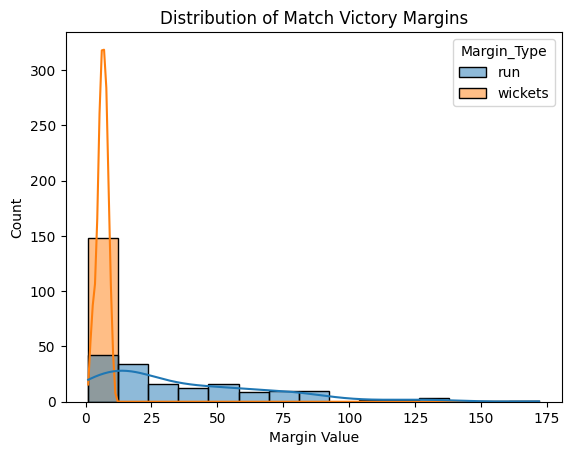

In [ ]:
sns.histplot(x=df['Margin_Value'], hue=df['Margin_Type'],kde=True, bins=15)
plt.title("Distribution of Match Victory Margins")
plt.xlabel("Margin Value")
plt.show()

In [ ]:
wickets=df[df['Margin_Type']=='wickets']
top10_wickets=wickets['Margin_Value'].value_counts().reset_index()
top10_wickets.index=top10_wickets.index+1
print("Top10\n:",top10_wickets)

Top10
:    Margin_Value  count
1             6     30
2             7     28
3             8     27
4             5     21
5             9     13
6             3      9
7             4      8
8            10      6
9             2      6


/tmp/ipython-input-4047290187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_wickets,x='Margin_Value',y='count',palette='magma')


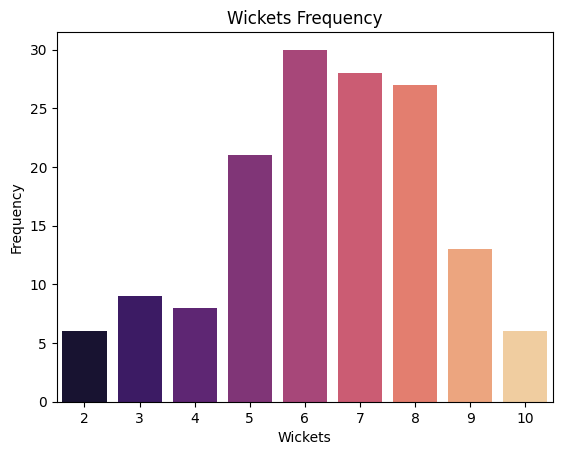

In [ ]:
sns.barplot(data=top10_wickets,x='Margin_Value',y='count',palette='magma')
plt.xlabel('Wickets')
plt.ylabel("Frequency")
plt.title("Wickets Frequency")
plt.show()

In [ ]:

runs=df[df['Margin_Type']=='run']
top10_runs=runs['Margin_Value'].value_counts()
top10_runs=top10_runs.reset_index()
top10_run=top10_runs.sort_values(by='count',ascending=False).head(10)
print("Top10\n:",top10_run)

Top10
:    Margin_Value  count
0             1      6
1             7      5
2             5      5
3            21      5
4            14      5
5            59      4
6             9      4
7             3      4
8            13      4
9            15      4


/tmp/ipython-input-3879906256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_run,x='Margin_Value',y='count',palette='viridis')


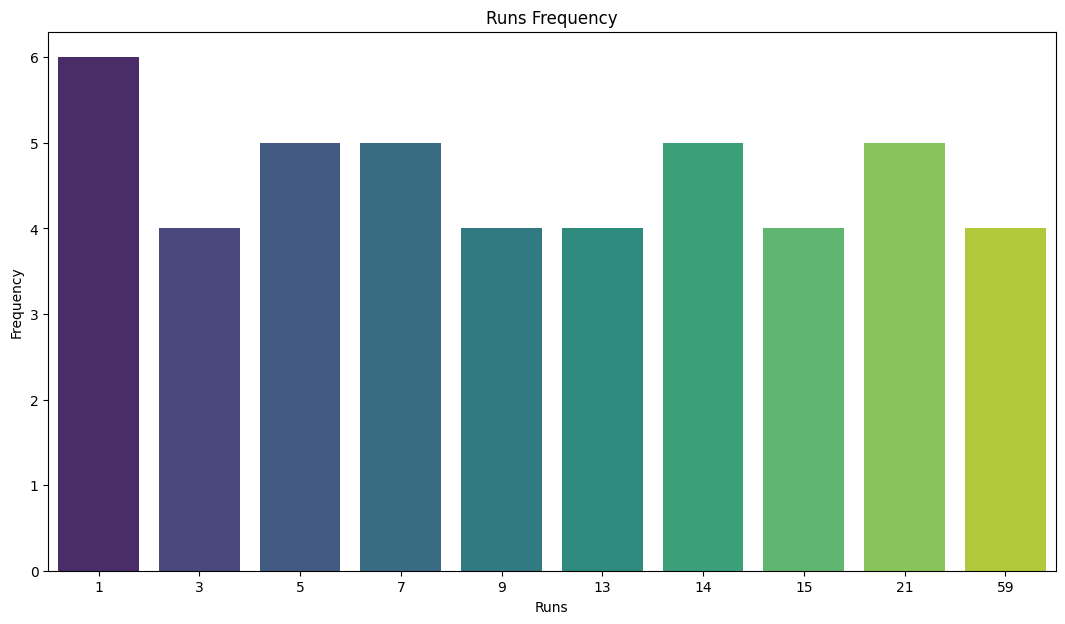

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(data=top10_run,x='Margin_Value',y='count',palette='viridis')
plt.xlabel('Runs')
plt.ylabel("Frequency")
plt.title("Runs Frequency")
plt.show()

In [ ]:
df[df['Margin_Type']=='run']

,Team1,Team2,Winner,Ground,Match Date,Margin_Value,Margin_Type
0,India,Pakistan,India,Johannesburg,2007-09-24,5,run
1,Australia,India,India,Durban,2007-09-22,15,run
3,South Africa,India,India,Durban,2007-09-20,37,run
6,England,India,India,Durban,2007-09-19,18,run
8,Bangladesh,Sri Lanka,Sri Lanka,Johannesburg,2007-09-18,64,run
...,...,...,...,...,...,...,...
300,Australia,England,Australia,Bridgetown,2024-06-08,36,run
303,Afghanistan,New Zealand,Afghanistan,Providence,2024-06-07,84,run
304,Canada,Ireland,Canada,New York,2024-06-07,12,run
307,Australia,Oman,Australia,Bridgetown,2024-06-05,39,run


#Feature Selection

In [ ]:
df['Year']=df['Match Date'].dt.year
df['Month']=df['Match Date'].dt.month
df=df.drop('Match Date',axis=1)

In [ ]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [ ]:
df['Season'] = df['Month'].apply(get_season)

In [ ]:
df.head()

,Team1,Team2,Winner,Ground,Margin_Value,Margin_Type,Year,Month,Season
0,India,Pakistan,India,Johannesburg,5,run,2007,9,Autumn
1,Australia,India,India,Durban,15,run,2007,9,Autumn
2,New Zealand,Pakistan,Pakistan,Cape Town,6,wickets,2007,9,Autumn
3,South Africa,India,India,Durban,37,run,2007,9,Autumn
4,Bangladesh,Pakistan,Pakistan,Cape Town,4,wickets,2007,9,Autumn


In [ ]:
df=df.drop('Month',axis=1)

In [ ]:
df.head()

,Team1,Team2,Winner,Ground,Margin_Value,Margin_Type,Year,Season
0,India,Pakistan,India,Johannesburg,5,run,2007,Autumn
1,Australia,India,India,Durban,15,run,2007,Autumn
2,New Zealand,Pakistan,Pakistan,Cape Town,6,wickets,2007,Autumn
3,South Africa,India,India,Durban,37,run,2007,Autumn
4,Bangladesh,Pakistan,Pakistan,Cape Town,4,wickets,2007,Autumn


In [ ]:
india_wins_season=df[df['Winner']=='India']
india_wins_season=india_wins_season.groupby('Season').size().reset_index(name='Count_per_season')#count per season

/tmp/ipython-input-2356514368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=india_wins_season,x='Season',y='Count_per_season',palette='Blues')


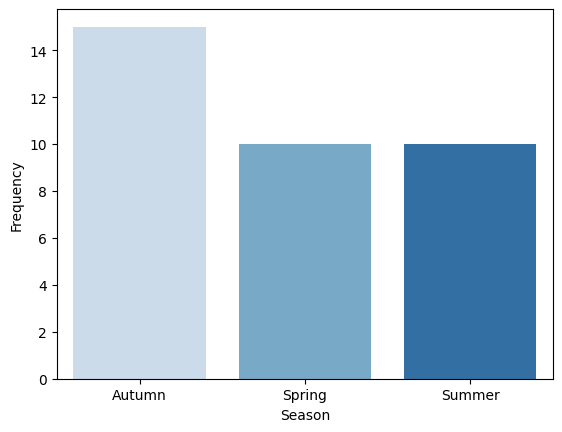

In [ ]:
sns.barplot(data=india_wins_season,x='Season',y='Count_per_season',palette='Blues')
plt.xlabel('Season')
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.shape

(317, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team1         317 non-null    object
 1   Team2         317 non-null    object
 2   Winner        317 non-null    object
 3   Ground        317 non-null    object
 4   Margin_Value  305 non-null    Int64 
 5   Margin_Type   305 non-null    object
 6   Year          317 non-null    int32 
 7   Season        317 non-null    object
dtypes: Int64(1), int32(1), object(6)
memory usage: 19.0+ KB


In [ ]:
df.head()

,Team1,Team2,Winner,Ground,Margin_Value,Margin_Type,Year,Season
0,India,Pakistan,India,Johannesburg,5,run,2007,Autumn
1,Australia,India,India,Durban,15,run,2007,Autumn
2,New Zealand,Pakistan,Pakistan,Cape Town,6,wickets,2007,Autumn
3,South Africa,India,India,Durban,37,run,2007,Autumn
4,Bangladesh,Pakistan,Pakistan,Cape Town,4,wickets,2007,Autumn


#Statistic

In [ ]:
run_margins = df[df['Margin_Type'] == 'run']['Margin_Value']
wicket_margins = df[df['Margin_Type'] == 'wickets']['Margin_Value']
run_mean=run_margins.mean()
wicket_mean=wicket_margins.mean()
run_median=run_margins.median()
wicket_median=wicket_margins.median()
print("Run Mean:",run_mean)
print("Wicket Mean:",wicket_mean)
print("Run Median:",run_median)
print("Wicket Median:",wicket_median)

Run Mean: 36.75796178343949
Wicket Mean: 6.385135135135135
Run Median: 25.0
Wicket Median: 6.5


In [ ]:
s=df['Margin_Value'].std()
v=df['Margin_Value'].var()
print('Std:',s)
print('Var:',v)

Std: 28.071330779538286
Var: 787.9996117342536


In [ ]:
#Chi2 test
contingency_table = pd.crosstab(df['Winner'], df['Season'])
print(contingency_table)

Season        Autumn  Spring  Summer
Winner                              
Afghanistan        2       5       5
Australia         16       9       5
Bangladesh         5       4       3
Canada             0       0       1
England           12      10       6
Hong Kong          0       1       0
India             15      10      10
Ireland            4       2       1
Namibia            4       0       0
Nepal              0       2       0
Netherlands        4       4       2
New Zealand       12       9       4
Oman               1       1       0
Pakistan          18       5       7
Scotland           4       1       2
South Africa      12       7      13
Sri Lanka         16       9       7
U.A.E.             1       0       0
U.S.A.             0       0       1
Uganda             0       0       1
West Indies        5      11       8
Zimbabwe           4       4       0
no result          3       3       1
tied               3       0       2


In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)#chi=(Ob-EX)^2/Ex
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 51.572966879935485
p-value: 0.26500495154610104


In [ ]:
alpha = 0.05
if p < alpha:
    print("Reject H0,Winner and Season are dependent")
else:
    print("Fail to reject H0,Winner and Season are independent")

Fail to reject H0,Winner and Season are independent


In [ ]:
#Then we can drop Season because both are independent

#Label-Encoder

In [ ]:
Label=df
from sklearn.preprocessing import LabelEncoder
cols={'Team1','Team2','Winner','Ground','Margin_Type','Season'}
for col in cols:
      label_encoder = LabelEncoder()
      Label[col] = label_encoder.fit_transform(Label[col])#it learns from the parameter and apply to data

In [ ]:
Label.head()

,Team1,Team2,Winner,Ground,Margin_Value,Margin_Type,Year,Season
0,6,14,6,19,5,0,2007,0
1,1,6,6,13,15,0,2007,0
2,12,14,13,6,6,1,2007,0
3,17,6,6,13,37,0,2007,0
4,2,14,13,6,4,1,2007,0


In [ ]:
Label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Team1         317 non-null    int64
 1   Team2         317 non-null    int64
 2   Winner        317 non-null    int64
 3   Ground        317 non-null    int64
 4   Margin_Value  305 non-null    Int64
 5   Margin_Type   317 non-null    int64
 6   Year          317 non-null    int32
 7   Season        317 non-null    int64
dtypes: Int64(1), int32(1), int64(6)
memory usage: 19.0 KB


In [ ]:
#we can use this for logistic,Tree based algorithms

#One-Hot encode

In [ ]:
One_hot=df
One_hot = pd.get_dummies(df, columns=['Team1','Team2','Winner','Ground','Margin_Type','Season'], drop_first=True)

In [ ]:
One_hot.head()

,Margin_Value,Year,Team1_1,Team1_2,Team1_3,Team1_4,Team1_5,Team1_6,Team1_7,Team1_8,...,Ground_33,Ground_34,Ground_35,Ground_36,Ground_37,Ground_38,Margin_Type_1,Margin_Type_2,Season_1,Season_2
0,5,2007,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15,2007,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6,2007,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,37,2007,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2007,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
One_hot.shape

(317, 110)

In [ ]:
One_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Columns: 110 entries, Margin_Value to Season_2
dtypes: Int64(1), bool(108), int32(1)
memory usage: 37.6 KB


In [ ]:
# we can use this for Linear model